In [1]:
import pandas as pd
import numpy as np
from pandas import json_normalize
import requests 
import json
import os
from dotenv import load_dotenv
import time
import sys
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("../")

In [6]:
url = "http://api.open-notify.org/iss-now.json"
url2 = "https://satellitemap.space/json/sl.json?0.2592483420529641+v1007+19253"

In [7]:
req = requests.get(url)
req.content

b'{"timestamp": 1683011709, "message": "success", "iss_position": {"longitude": "-36.3734", "latitude": "51.4438"}}'

In [8]:
req2 = requests.get(url2)
req2.content

b'{"stamp":1683011643,"sats":[{"id":25544,"name":"0-A","oname":"ISS","lat":51.7944,"lng":-42.9785,"alt":426.7,"alt2":426.2,"p":413.9,"lat2":47.9707,"lng2":-14.6275,"illum":1,"raan":199.109,"age":0.6},{"id":44713,"name":"2-A","oname":"STARLINK 1007","lat":52.6033,"lng":-40.4562,"alt":552.3,"alt2":550.7,"p":546.3,"lat2":46.0206,"lng2":-14.4638,"illum":1,"raan":190.029,"age":0.8},{"id":44714,"name":"2-B","oname":"STARLINK 1008","lat":-25.2811,"lng":58.3121,"alt":555,"alt2":560.5,"p":546.4,"lat2":-38.5203,"lng2":72.8968,"illum":1,"raan":189.832,"age":0.8},{"id":44715,"name":"2-C","oname":"STARLINK 1009","lat":-53.1606,"lng":130.8653,"alt":566.6,"alt2":564.7,"p":546.6,"lat2":-48.5212,"lng2":158.5702,"illum":1,"raan":188.9867,"age":0.6},{"id":44716,"name":"2-D","oname":"STARLINK 1010","lat":6.4002,"lng":32.8155,"alt":547.5,"alt2":549.9,"p":546.7,"lat2":-8.7194,"lng2":42.9466,"illum":1,"raan":188.0141,"age":0.4},{"id":44717,"name":"2-E","oname":"STARLINK 1011","lat":-1.7180,"lng":58.9061,"alt

In [9]:
req2.json()['sats'][1:]

[{'id': 44713,
  'name': '2-A',
  'oname': 'STARLINK 1007',
  'lat': 52.6033,
  'lng': -40.4562,
  'alt': 552.3,
  'alt2': 550.7,
  'p': 546.3,
  'lat2': 46.0206,
  'lng2': -14.4638,
  'illum': 1,
  'raan': 190.029,
  'age': 0.8},
 {'id': 44714,
  'name': '2-B',
  'oname': 'STARLINK 1008',
  'lat': -25.2811,
  'lng': 58.3121,
  'alt': 555,
  'alt2': 560.5,
  'p': 546.4,
  'lat2': -38.5203,
  'lng2': 72.8968,
  'illum': 1,
  'raan': 189.832,
  'age': 0.8},
 {'id': 44715,
  'name': '2-C',
  'oname': 'STARLINK 1009',
  'lat': -53.1606,
  'lng': 130.8653,
  'alt': 566.6,
  'alt2': 564.7,
  'p': 546.6,
  'lat2': -48.5212,
  'lng2': 158.5702,
  'illum': 1,
  'raan': 188.9867,
  'age': 0.6},
 {'id': 44716,
  'name': '2-D',
  'oname': 'STARLINK 1010',
  'lat': 6.4002,
  'lng': 32.8155,
  'alt': 547.5,
  'alt2': 549.9,
  'p': 546.7,
  'lat2': -8.7194,
  'lng2': 42.9466,
  'illum': 1,
  'raan': 188.0141,
  'age': 0.4},
 {'id': 44717,
  'name': '2-E',
  'oname': 'STARLINK 1011',
  'lat': -1.718,


In [10]:
df_sl = pd.DataFrame(requests.get(url2).json()['sats'][1:])
df_sl = df_sl[df_sl['oname'] != 'noname']
df_sl = df_sl[['name', 'oname', 'lat', 'lng']]
df_sl

,name,oname,lat,lng
0,2-A,STARLINK 1007,52.6033,-40.4562
1,2-B,STARLINK 1008,-25.2811,58.3121
2,2-C,STARLINK 1009,-53.1606,130.8653
3,2-D,STARLINK 1010,6.4002,32.8155
4,2-E,STARLINK 1011,-1.7180,58.9061
...,...,...,...,...
3834,79-AZ,STARLINK-5758,18.9083,151.0062
3835,79-BA,STARLINK-5793,41.8086,100.0522
3836,79-BB,STARLINK-5795,18.5057,151.5143
3837,79-BC,STARLINK-5798,18.1433,151.9755


In [11]:
req.json()['iss_position']

{'longitude': '-36.3734', 'latitude': '51.4438'}

In [12]:
speed_f9 = 6724
height_iss = 400000
earth_radius = 40008
speed_iss = 30000

distance = earth_radius + height_iss
relative_speed = speed_f9 + speed_iss

time_iss = distance / relative_speed

minutes, seconds = divmod(time_iss*60, 60)

print(f"The Falcon 9 and the ISS will cross in {int(minutes)} mins and {int(seconds)} segs.")

time_iss = (11*60)+58
iss_distance = speed_iss / time_iss
print(f'The ISS will travel {iss_distance:.10f}km in 11 min and 58 segs')

The Falcon 9 and the ISS will cross in 11 mins and 58 segs.
The ISS will travel 41.7827298050km in 11 min and 58 segs


In [13]:
speed_f9 = 6724
height_sl = 550000
earth_radius = 40008
speed_sl = 27000

distance = earth_radius + height_sl
relative_speed = speed_f9 + speed_sl

time_sl = distance / relative_speed

minutes, seconds = divmod(time_sl*60, 60)

print(f"The Falcon 9 and the SL will cross in {int(minutes)} mins and {int(seconds)} segs.")

time_sl = (17*60)+29
sl_distance = speed_sl / time_sl
print(f'The StarLink will travel {iss_distance:.10f}km in 17 min and 29 segs')

The Falcon 9 and the SL will cross in 17 mins and 29 segs.
The StarLink will travel 41.7827298050km in 17 min and 29 segs


In [24]:
def get_iss_sl_positions(numb_of_samples):
    url = "http://api.open-notify.org/iss-now.json"
    url2 = "https://satellitemap.space/json/sl.json?0.2592483420529641+v1007+19253"
    position_iss = []
    position_sl = []
    location_iss = requests.get(url).json()
    location_sl = requests.get(url2).json()['sats'][1:]
    
    for i in range(numb_of_samples):

        if location_iss['message'] == 'success':
            time.sleep(2)
            print(i)
            position_iss.append(location_iss['iss_position'])
            
        if 'id' in location_sl:
            time.sleep(240)
            print(i)
            position_sl.append(location_sl)
            

        else:
            break


    for i in location_iss:

        if ['latitude']==28.4556:
            print(f'ISS Not Clear')

        if ['longitude']==-80.5278:
            print(f'ISS Not Clear')

        if ['latitude']==28.8960:
            print(f'ISS Not Clear')

        if ['longitude']==-81.1184:
            print(f'ISS Not Clear')
        
        if ['longitude']==-100.9969:
            print(f'The ISS is in a range of 2000km')

        if ['latitude']==46.5012:
            print(f'The ISS is in a range of 2000km')
        else:
            print(f'ISS Clear')
            break

    for i in location_sl:

        if i['lat']==28.4556:
            print(f'SL Not Clear')

        if i['lng']==-80.5278:
            print(f'SL Not Clear')

        if i['lat']==28.8960:
            print(f'SL Not Clear')

        if i['lng']==-81.1184:
            print(f'SL Not Clear')
            
        if i['lat']==32.9365:
            print(f'The Starlink is in a range of 500km')

        if i['lng']==-85.671860:
            print(f'The Starlink is in a range of 500km')

        else:
            print(f'SL Clear')
            break
            
            
    df_iss = pd.DataFrame(position_iss)

    return df_iss, df_sl

In [25]:
get_iss_sl_positions(1)

0
ISS Clear
SL Clear


(  longitude latitude
 0  -13.0611  47.3185,
        name          oname      lat       lng
 0       2-A  STARLINK 1007  52.6033  -40.4562
 1       2-B  STARLINK 1008 -25.2811   58.3121
 2       2-C  STARLINK 1009 -53.1606  130.8653
 3       2-D  STARLINK 1010   6.4002   32.8155
 4       2-E  STARLINK 1011  -1.7180   58.9061
 ...     ...            ...      ...       ...
 3834  79-AZ  STARLINK-5758  18.9083  151.0062
 3835  79-BA  STARLINK-5793  41.8086  100.0522
 3836  79-BB  STARLINK-5795  18.5057  151.5143
 3837  79-BC  STARLINK-5798  18.1433  151.9755
 3838  79-BD  STARLINK-5800  17.7943  152.4124
 
 [3839 rows x 4 columns])

In [26]:
df = pd.read_csv("Falcon_9_and_Falcon_Heavy_launches.csv")
df.columns
df = df[['Date', 'Time', 'Version, Booster', 'Launch_Site', 'Payload', 
        'Payload_Mass', 'Orbit', 'Customer', 'Launch_Outcome', 'Booster_landing']]
df

,Date,Time,"Version, Booster",Launch_Site,Payload,Payload_Mass,Orbit,Customer,Launch_Outcome,Booster_landing
0,4 June 2010,18:45,F9 v1.0 B0003,CCAFS SLC-40,Dragon Spacecraft Qualification Unit,No payload (excl. Dragon Mass),LEO,SpaceX,Success,Failure
1,8 December 2010,15:43,F9 v1.0 B0004,CCAFS SLC-40,Dragon demo flight C1,Classified (excl. Dragon Mass),LEO (ISS),NASA (COTS) NRO,Success,Failure
2,22 May 2012,07:44,F9 v1.0 B0005,CCAFS SLC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt
3,8 October 2012,00:35,F9 v1.0 B0006,CCAFS SLC-40,SpaceX CRS-1,"4,700",LEO (ISS),NASA (CRS),Success,No attempt
4,8 October 2012,00:35,F9 v1.0 B0006,CCAFS SLC-40,Orbcomm-OG2,172,LEO,Orbcomm,Partial failure,No attempt
...,...,...,...,...,...,...,...,...,...,...
160,19 June 2022,04:27,F9 B5 B1061.9,CCSFS SLC-40,Globalstar-2 M087 (FM15),700,LEO,GlobalstarUnknown US Government Agency,Success,Success(drone ship)
161,29 June 2022,21:04,F9 B5 B1073.2,CCSFS SLC-40,SES-22,"3,500",GTO,SES,Success,Success(drone ship)
162,7 July 2022,13:11,F9 B5 B1058.13,CCSFS SLC-40,Starlink Group 4-21 (53 satellites),"16,250",LEO,SpaceX,Success,Success(drone ship)
163,11 July 2022,01:39,F9 B5 B1063.6,VSFB SLC-4E,Starlink Group 3-1 (46 satellites),"13,570",SSO,SpaceX,Success,Success(drone ship)


In [28]:
f9_filter = df['Version, Booster'].str.contains('F9 B5')
df_f9b5 = df[f9_filter]
df_f9b5

,Date,Time,"Version, Booster",Launch_Site,Payload,Payload_Mass,Orbit,Customer,Launch_Outcome,Booster_landing
54,11 May 2018,20:14,F9 B5 B1046.1,KSC LC-39A,Bangabandhu-1,"3,600",GTO,Thales-Alenia / BTRC,Success,Success
58,22 July 2018,05:50,F9 B5 B1047.1,CCAFS SLC-40,Telstar 19V,"7,075",GTO,Telesat,Success,Success
59,25 July 2018,11:39,F9 B5 B1047.1,VAFB SLC-4E,Iridium NEXT-7,"9,600",Polar LEO,Iridium Communications,Success,Success
60,7 August 2018,05:18,F9 B5 B1046.2,CCAFS SLC-40,Merah Putih,"5,800",GTO,Telkom Indonesia,Success,Success
61,10 September 2018,04:45,F9 B5 B1049.1,CCAFS SLC-40,Telstar 18V / Apstar-5C,"7,060",GTO,Telesat,Success,Success
...,...,...,...,...,...,...,...,...,...,...
160,19 June 2022,04:27,F9 B5 B1061.9,CCSFS SLC-40,Globalstar-2 M087 (FM15),700,LEO,GlobalstarUnknown US Government Agency,Success,Success(drone ship)
161,29 June 2022,21:04,F9 B5 B1073.2,CCSFS SLC-40,SES-22,"3,500",GTO,SES,Success,Success(drone ship)
162,7 July 2022,13:11,F9 B5 B1058.13,CCSFS SLC-40,Starlink Group 4-21 (53 satellites),"16,250",LEO,SpaceX,Success,Success(drone ship)
163,11 July 2022,01:39,F9 B5 B1063.6,VSFB SLC-4E,Starlink Group 3-1 (46 satellites),"13,570",SSO,SpaceX,Success,Success(drone ship)


In [38]:
df_f9b5['Launch_Outcome'].value_counts()

Launch_Outcome
Success    108
Name: count, dtype: int64

In [37]:
df_f9b5['Booster_landing'].value_counts()

Booster_landing
Success(drone ship)       79
Success(ground pad)       13
Success                    8
No attempt                 3
Failure(drone ship)        2
Failure                    1
Failure (drone ship)       1
Success[e](drone ship)     1
Name: count, dtype: int64

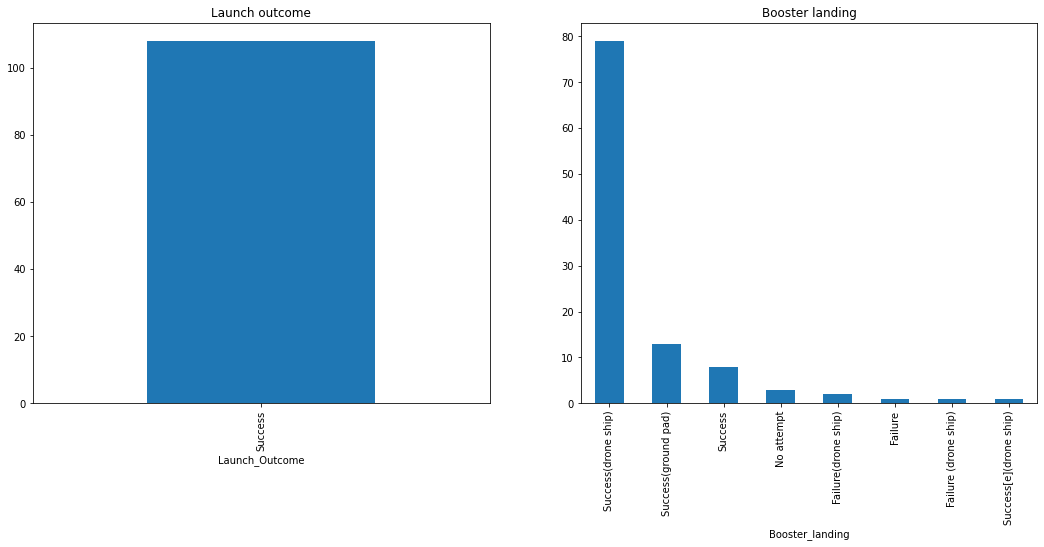

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(18,7))
df_f9b5['Booster_landing'].value_counts().plot(kind="bar", ax=axs[1])
axs[1].set_title("Booster landing")
df_f9b5['Launch_Outcome'].value_counts().plot(kind="bar", ax=axs[0])
axs[0].set_title("Launch outcome")
plt.show()
fig.savefig('launch_landing.jpg')

In [30]:
df_f9b5['Orbit'].mode()

0    LEO
Name: Orbit, dtype: object

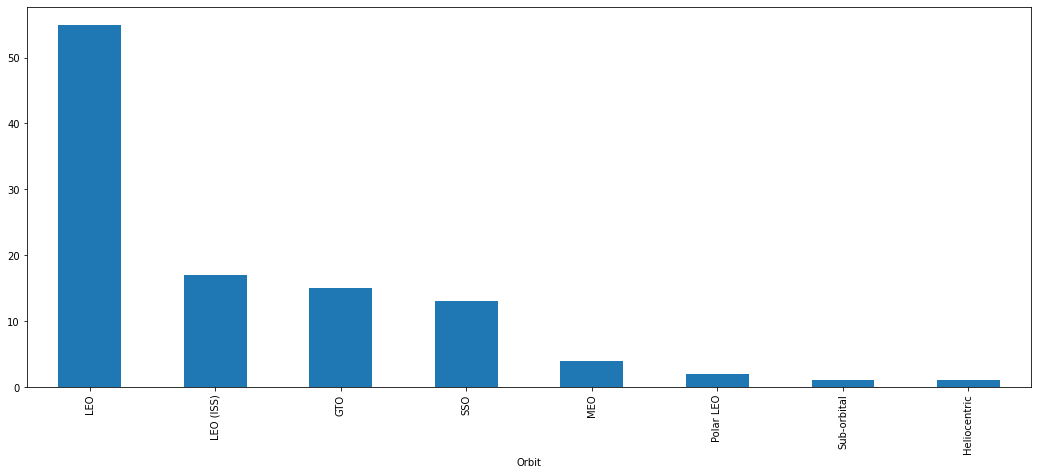

In [41]:
df_f9b5['Orbit'].value_counts().plot(kind="bar", figsize=(18,7));
plt.savefig('orbit.jpg')

In [32]:
df_f9b5['Customer'].mode()

0    SpaceX
Name: Customer, dtype: object

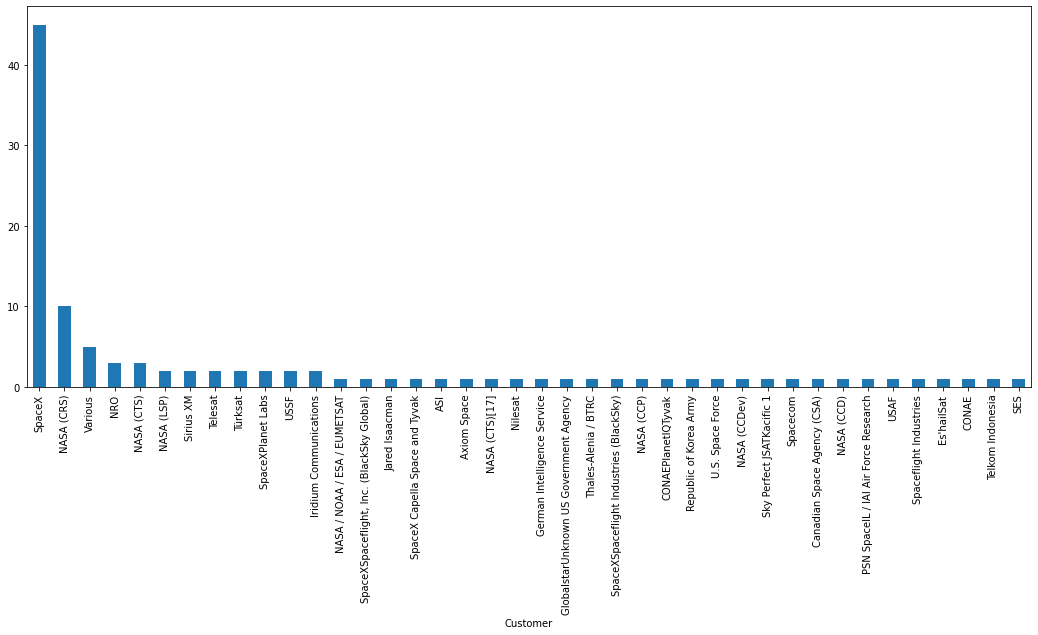

In [40]:
df_f9b5['Customer'].value_counts().plot(kind="bar", figsize=(18,7));
fig.savefig(users/'customer.jpg')

In [34]:
df_f9b5['Launch_Site'].unique()

array(['KSC LC-39A', 'CCAFS SLC-40', 'VAFB SLC-4E', 'CCAF LC-40',
       'CCSFS SLC-40', 'VSFB SLC-4E', 'VSFBSLC-4E'], dtype=object)

In [35]:
nasa_filter = df['Customer'].str.contains('NASA')
df_f9b5_nasa = df_f9b5[nasa_filter]
df_f9b5_nasa

/var/folders/z6/z8y0rh8s0tg3r1bbj96c2cvh0000gn/T/ipykernel_1044/2598075905.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_f9b5_nasa = df_f9b5[nasa_filter]


,Date,Time,"Version, Booster",Launch_Site,Payload,Payload_Mass,Orbit,Customer,Launch_Outcome,Booster_landing
65,5 December 2018,18:16,F9 B5 B1050,CCAFS SLC-40,SpaceX CRS-16,"2,500",LEO (ISS),NASA (CRS),Success,Failure
69,2 March 2019,07:49,F9 B5 B1051.1,KSC LC-39A,Crew Dragon Demo-1,"12,055",LEO (ISS),NASA (CCD),Success,Success(drone ship)
70,4 May 2019,06:48,F9 B5 B1056.1,CCAFS SLC-40,SpaceX CRS-17,"2,495",LEO (ISS),NASA (CRS),Success,Success(drone ship)
73,25 July 2019,22:01,F9 B5 B1056.2,CCAF LC-40,SpaceX CRS-18,"2,268",LEO (ISS),NASA (CRS),Success,Success(ground pad)
76,5 December 2019,17:29,F9 B5 B1059.1,CCAFS SLC-40,SpaceX CRS-19,"2,617",LEO (ISS),NASA (CRS),Success,Success(drone ship)
79,19 January 2020,15:30,F9 B5 B1046.4,KSC LC-39A,Crew Dragon in-flight abort test,"12,050",Sub-orbital,NASA (CTS),Success,No attempt
82,7 March 2020,04:50,F9 B5 B1059.2,CCAFS SLC-40,SpaceX CRS-20,"1,977",LEO (ISS),NASA (CRS),Success,Success(ground pad)
85,30 May 2020,19:22,F9 B5 B1058.1,KSC LC-39A,Crew Dragon Demo-2,"12,530",LEO (ISS),NASA (CCDev),Success,Success(drone ship)
98,16 November 2020,00:27,F9 B5 B1061.1,KSC LC-39A,Crew-1,"12,500",LEO (ISS),NASA (CCP),Success,Success(drone ship)
99,21 November 2020,17:17:08,F9 B5 B1063.1,VAFB SLC-4E,Sentinel-6 Michael Freilich,"1,192",LEO,NASA / NOAA / ESA / EUMETSAT,Success,Success(ground pad)
